<b><h1>Análise de dado do Inep - IDD</h1></b>

In [1]:
#Imports necessários para o projeto

%matplotlib inline
import pandas as pd

filename = 'dataset/dataset_geral.csv'
df = pd.read_csv(filename, sep=";")

c:\users\lgomes\appdata\local\programs\python\python37-32\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
# Mostra as dez primeiras linhas do arquivo lido
df.head(10)

,nu_ano,co_grupo,co_ies,co_categad,co_orgacad,co_munic,co_uf_curso,co_regiao_curso,co_curso,ano_in_grad,...,tp_pres,nt_ger,enem_nt_cn,enem_nt_ch,enem_nt_lc,enem_nt_mt,co_modalidade,IN_REGULAR,TP_INSCRICAO_ADM,ausente da lista 2015
0,2015,22,833,10008,10022,1100023,11.0,1.0,21267,2011,...,555,25.3,583.1,598.3,593,672.1,1.0,NaN,NaN,NaN
1,2015,1,1540,10008,10022,1100023,11.0,1.0,22113,2012,...,555,64.7,552.7,627.1,557.4,434.6,1.0,NaN,NaN,NaN
2,2015,1,833,10008,10022,1100023,11.0,1.0,27377,2012,...,555,32.6,446.6,541.9,484.4,594,1.0,NaN,NaN,NaN
3,2015,2,1540,10008,10022,1100023,11.0,1.0,54688,2011,...,555,56,538.5,621.7,590.4,599.8,1.0,NaN,NaN,NaN
4,2015,18,1540,10008,10022,1100023,11.0,1.0,96110,2011,...,555,38.9,425.5,490,504.7,394.5,1.0,NaN,NaN,NaN
5,2015,18,4613,10005,10022,1100023,11.0,1.0,117508,2011,...,555,48.9,473.4,542.3,594.9,574.5,1.0,NaN,NaN,NaN
6,2015,22,833,10008,10022,1100023,11.0,1.0,21267,2011,...,555,33.2,466.2,572.5,532.8,486,1.0,NaN,NaN,NaN
7,2015,22,833,10008,10022,1100023,11.0,1.0,21267,2012,...,555,44.8,388.7,396.3,456,510.1,1.0,NaN,NaN,NaN
8,2015,22,833,10008,10022,1100023,11.0,1.0,21267,2012,...,555,40.1,505.8,573.4,583.2,486.3,1.0,NaN,NaN,NaN
9,2015,22,833,10008,10022,1100023,11.0,1.0,21267,2012,...,555,31.1,462.2,422.2,487.3,471.2,1.0,NaN,NaN,NaN


In [4]:
#Mostra quantidade de linhas e colunas

df.shape

(795751, 22)

É possivel observar que esta amostrapossui 795.751 registros sobre 22 tipos de colunas

<h2><b>Diferença de notas entre instituições por prova</b></h2>

<h3><b>Ciências da Natureza</b></h3>

<h2><b>Diferença de desempenho entre modalidade de ensino: EAD e Presencial</b></h2>


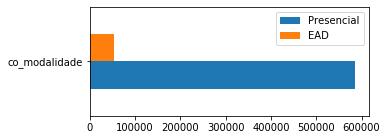

In [5]:
df['co_modalidade'].value_counts().to_frame().T.rename(columns={0.0:'EAD',1.0:'Presencial'}).plot(kind='barh', figsize=(5,2))

Observamos a comparação em quantidade de cursos presentes entre as modalidades de cursos: EAD e Presencial.

A modalidade Presencial é quem se destaca, sobre os dados entre os anos 2009 a 2017

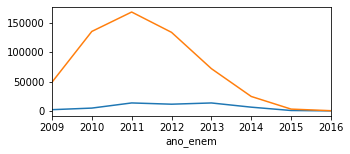

In [6]:
df.loc[df['co_modalidade'] == 0.0].groupby('ano_enem').size().plot(kind='line', figsize=(5,2))
df.loc[df['co_modalidade'] == 1.0].groupby('ano_enem').size().plot(kind='line', figsize=(5,2))

É possivel observar a grandeza de diferença entre as modalidades (Azul para EAD Laranja para Presencial) em função da identificação do ano de Enem selecionado entre as modalidades EAD e Presencial.

Isso significa que ao decorrer dos anos, a quantidade de alunos na qual realizaram a prova do enem para os cursos presenciais somente cresceram no ano de 2011, com uma quda brusca nos anos seguintes. 

Por se tratar de concorrencia entre tipos de cursos, curiosamente no crescimento do ano de 2011 até o ano de 2016 não houve alteração significante de valores.

In [7]:
# df['nt_ger'] = pd.to_numeric(df['nt_ger'],errors='coerce')

Realizando conversão pois são presentes alguns dados com formatos de numeros diferentes para floar (com ',' e '.')

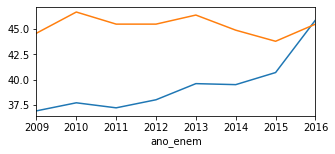

In [8]:
df['nt_ger'] = pd.to_numeric(df['nt_ger'],errors='coerce')
df.loc[df['co_modalidade'] == 0.0].groupby('ano_enem')['nt_ger'].median().plot(kind='line', figsize=(5,2))
df.loc[df['co_modalidade'] == 1.0].groupby('ano_enem')['nt_ger'].median().plot(kind='line', figsize=(5,2))

Com este gráfico, é possivel notar o crescimento para a nota modalidade Presencial durante o decorrer dos anos.

Em contra partida, a nota de EAD se manteve constante sem sair da margem de erro de 3 pontos.

<h2><b>Comparação: Nota Prova Ciencias Humanas</b></h2>
    

In [20]:
df['enem_nt_cn'].head(10)

0    583.1
1    552.7
2    446.6
3    538.5
4    425.5
5    473.4
6    466.2
7    388.7
8    505.8
9    462.2
Name: enem_nt_cn, dtype: object

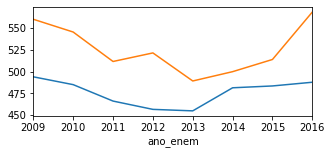

In [21]:
df['enem_nt_cn'] = pd.to_numeric(df['enem_nt_cn'],errors='coerce')
df.loc[df['co_modalidade'] == 0.0].groupby('ano_enem')['enem_nt_cn'].median().plot(kind='line', figsize=(5,2))
df.loc[df['co_modalidade'] == 1.0].groupby('ano_enem')['enem_nt_cn'].median().plot(kind='line', figsize=(5,2))

<h2><b>Comparação: Nota Prova Ciencias da Natureza</b></h2>

In [17]:
df['enem_nt_ch'].head(10)

0    598.3
1    627.1
2    541.9
3    621.7
4      490
5    542.3
6    572.5
7    396.3
8    573.4
9    422.2
Name: enem_nt_ch, dtype: object

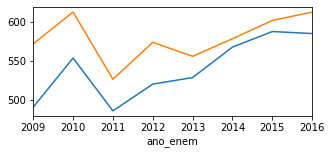

In [22]:
df['enem_nt_ch'] = pd.to_numeric(df['enem_nt_ch'],errors='coerce')
df.loc[df['co_modalidade'] == 0.0].groupby('ano_enem')['enem_nt_ch'].median().plot(kind='line', figsize=(5,2))
df.loc[df['co_modalidade'] == 1.0].groupby('ano_enem')['enem_nt_ch'].median().plot(kind='line', figsize=(5,2))

<h2><b>Comparação: Nota Prova Linguagens e Códigos</b></h2>

In [18]:
df['enem_nt_lc'].head(10)

0      593
1    557.4
2    484.4
3    590.4
4    504.7
5    594.9
6    532.8
7      456
8    583.2
9    487.3
Name: enem_nt_lc, dtype: object

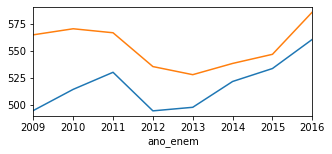

In [23]:
df['enem_nt_lc'] = pd.to_numeric(df['enem_nt_lc'],errors='coerce')
df.loc[df['co_modalidade'] == 0.0].groupby('ano_enem')['enem_nt_lc'].median().plot(kind='line', figsize=(5,2))
df.loc[df['co_modalidade'] == 1.0].groupby('ano_enem')['enem_nt_lc'].median().plot(kind='line', figsize=(5,2))

<h2><b>Comparação: Nota Prova Matemática</b></h2>

In [19]:
df['enem_nt_mt'].head(10)

0    672.1
1    434.6
2      594
3    599.8
4    394.5
5    574.5
6      486
7    510.1
8    486.3
9    471.2
Name: enem_nt_mt, dtype: object

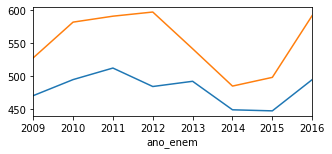

In [24]:
df['enem_nt_mt'] = pd.to_numeric(df['enem_nt_mt'],errors='coerce')
df.loc[df['co_modalidade'] == 0.0].groupby('ano_enem')['enem_nt_mt'].median().plot(kind='line', figsize=(5,2))
df.loc[df['co_modalidade'] == 1.0].groupby('ano_enem')['enem_nt_mt'].median().plot(kind='line', figsize=(5,2))

<h2><b>Diferença de desempenho entre Instituto Federal e Faculdade</b></h2>

<h2><b>Medias notas Escolas: Federal, Estadual Municipal, Privada sem funs lucrativos, Privada com fins lucrativos</b></h2>

<h2><b>Diferença Escola Privada com Fins Lucrativos com Estadual</b></h2>